In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [3]:
dataframe = pd.read_csv ("C:/Users/ATUL/OneDrive/Desktop/Credit card fraud detection/creditcard.csv")
dataframe.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
dataframe.isnull().values.any()

False

In [5]:
dataframe["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [6]:
non_fraud = len(dataframe.Class == 0)
fraud = len(dataframe[dataframe.Class == 1])
fraud_precentage = (fraud/(fraud + non_fraud))*100

print("Number of Genuine Transactions: ",non_fraud)
print("Number of Fraud Transactions: ", fraud)
print("Percentage of Fraud Transactions: {:.4f}".format(fraud_precentage))

Number of Genuine Transactions:  284807
Number of Fraud Transactions:  492
Percentage of Fraud Transactions: 0.1725


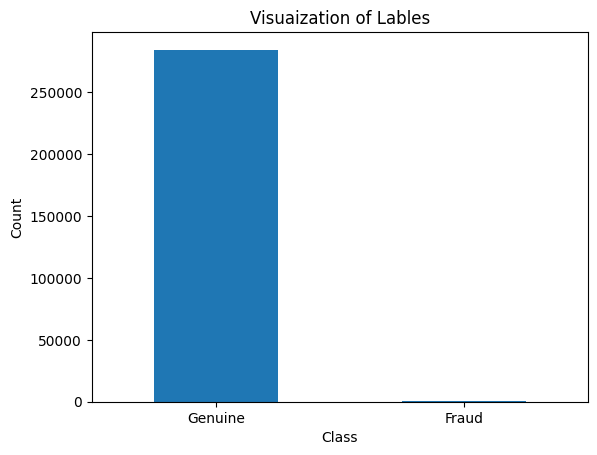

In [7]:
lables = ["Genuine","Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'],sort = True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visuaization of Lables")
plt.ylabel("Count")
plt.xticks(range(2),lables)
plt.show()

In [8]:
scaler = StandardScaler()
dataframe["NormalizeAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1,1))
dataframe.drop(["Amount","Time"], inplace = True, axis = 1)
Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis = 1)

In [9]:
from sklearn.model_selection import train_test_split
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


In [10]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100)

In [11]:
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y)*100

print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.95552590615966


In [12]:

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
def metrices(actuals, predictions, **kwargs):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [14]:
from sklearn.metrics import plot_confusion_matrix

LABELS = ['Normal', 'Fraud']
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix (Random Forest)")
print(confusion_matrix_rf)
#plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix (Random Forest)")


Confusion Matrix (Random Forest)
[[85297    10]
 [   28   108]]


In [15]:
from sklearn import metrics

#print("Random Forest model")
#print()
#metrics(test_Y, predictions_rf.round())


TypeError: object of type 'int' has no len()